<a href="https://colab.research.google.com/github/BharathKrishna29/major-project/blob/main/covidUSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importing the dataset

In [ ]:
import pandas as pd
df = pd.read_csv('/content/covid_19_data.csv')
df.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0
306428,306429,05/29/2021,Zuid-Holland,Netherlands,2021-05-30 04:20:55,391559.0,4252.0,0.0


In [ ]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df['Last Update'] = pd.to_datetime(df['Last Update'])

# extracting USA out of world data

In [ ]:
#gating USA data for doing  tableu part
import pandas as pd
df_x = pd.read_csv('/content/USA_data.csv')
df_x.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,32,2020-01-22 00:00:00,Washington,US,2020-01-22 17:00:00,1.0,0.0,0.0
1,72,2020-01-23 00:00:00,Washington,US,2020-01-23 17:00:00,1.0,0.0,0.0
2,122,2020-01-24 00:00:00,Washington,US,2020-01-24 17:00:00,1.0,0.0,0.0
3,123,2020-01-24 00:00:00,Chicago,US,2020-01-24 17:00:00,1.0,0.0,0.0
4,165,2020-01-25 00:00:00,Washington,US,2020-01-25 17:00:00,1.0,0.0,0.0


In [ ]:

df_x = df_x.drop( ['SNo']  ,axis = 1)
df_x.head()


,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22 00:00:00,Washington,US,2020-01-22 17:00:00,1.0,0.0,0.0
1,2020-01-23 00:00:00,Washington,US,2020-01-23 17:00:00,1.0,0.0,0.0
2,2020-01-24 00:00:00,Washington,US,2020-01-24 17:00:00,1.0,0.0,0.0
3,2020-01-24 00:00:00,Chicago,US,2020-01-24 17:00:00,1.0,0.0,0.0
4,2020-01-25 00:00:00,Washington,US,2020-01-25 17:00:00,1.0,0.0,0.0


# plotting the graph using MATPLOTLIB librariy -

**plotting the graph for Deaths:**

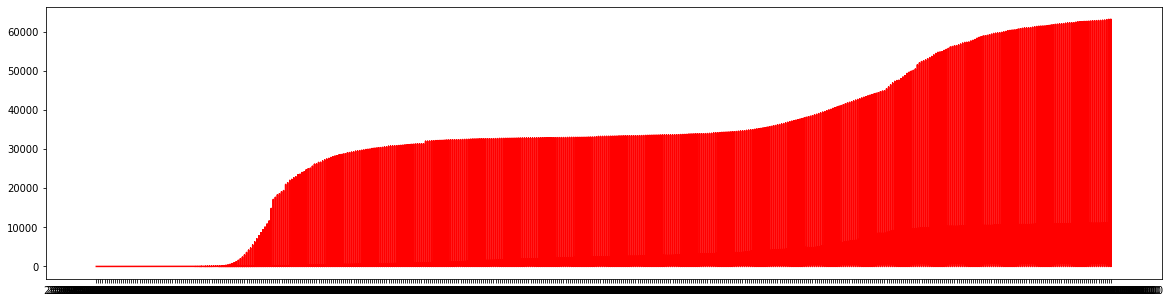

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))


plt.plot(df_x['ObservationDate'].sort_values() , df_x['Deaths'] , color='r')

**plotting the graph for Recovered:**

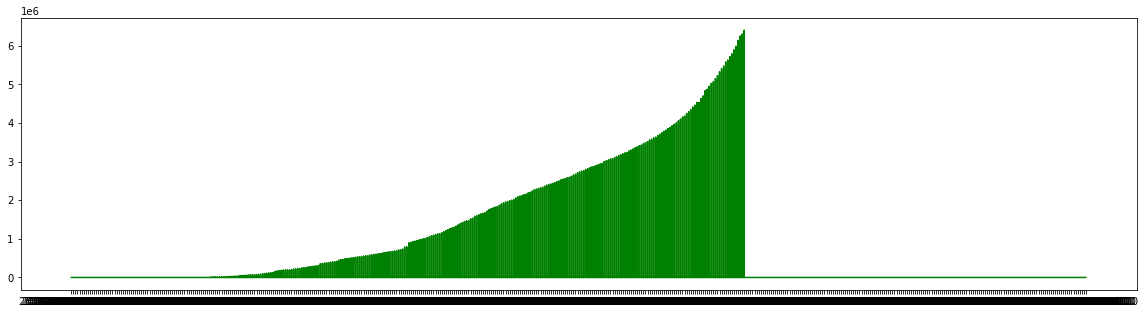

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(df_x['ObservationDate'].sort_values() , df_x['Recovered'] , color='g')

**plotting the graph for Confirmed:**

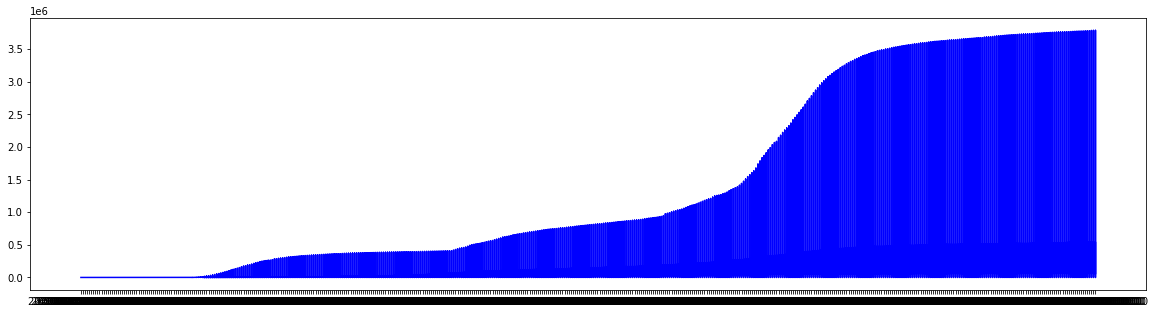

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))

plt.plot(df_x['ObservationDate'].sort_values() , df_x['Confirmed'] , color= 'b')


# Forecasting for Confirmed cases:

In [ ]:
df1 = df_x.iloc[:,[0,4]]
df1

,ObservationDate,Confirmed
0,2020-01-22 00:00:00,1.0
1,2020-01-23 00:00:00,1.0
2,2020-01-24 00:00:00,1.0
3,2020-01-24 00:00:00,1.0
4,2020-01-25 00:00:00,1.0
...,...,...
26735,2021-05-29 00:00:00,675165.0
26736,2021-05-29 00:00:00,435849.0
26737,2021-05-29 00:00:00,161287.0
26738,2021-05-29 00:00:00,674003.0


In [ ]:
df1 = df1.rename(columns ={'Confirmed':'y','ObservationDate':'ds'})

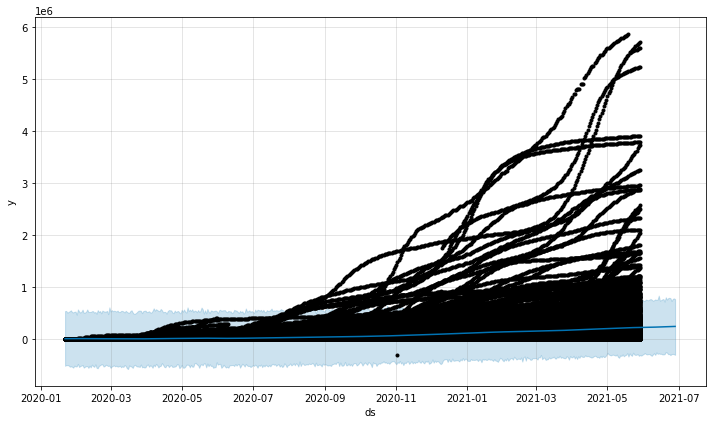

In [ ]:
from fbprophet import Prophet
#dir(Prophet)
model = Prophet(interval_width=0.95 ,daily_seasonality=True,yearly_seasonality=True)
model.fit(df1)
model.component_modes
future_dates = model.make_future_dataframe(periods=30,freq='D',include_history=True)
prediction = model.predict(future_dates)
#prediction.head()
plot1 = model.plot(prediction[['ds','yhat_lower','trend','yhat_upper','yhat']])


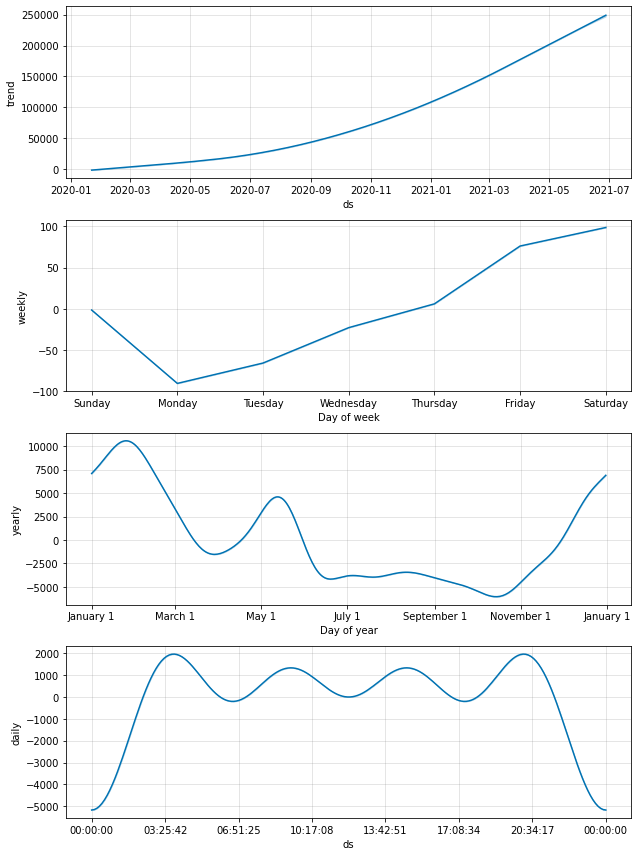

In [ ]:
plot2 = model.plot_components(prediction)

In [ ]:
df1['ds'].nunique()

494

# cross validation of data to find out errors:

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model,initial='200 days' ,period='15 days' ,horizon='30 days')
df_cv.head()
df_cv.shape

INFO:fbprophet:Making 18 forecasts with cutoffs between 2020-08-17 00:00:00 and 2021-04-29 00:00:00


(410049, 6)

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,4 days,8.594052e+10,293156.132418,131778.271014,3.839257,0.923310
1,5 days,8.690667e+10,294799.368884,132597.061277,3.839766,0.923046
2,6 days,8.788894e+10,296460.681848,133437.568607,3.834392,0.922537
3,7 days,8.891672e+10,298189.074475,134298.236218,3.837722,0.922028
4,8 days,8.995096e+10,299918.259847,135179.724238,3.830526,0.921347


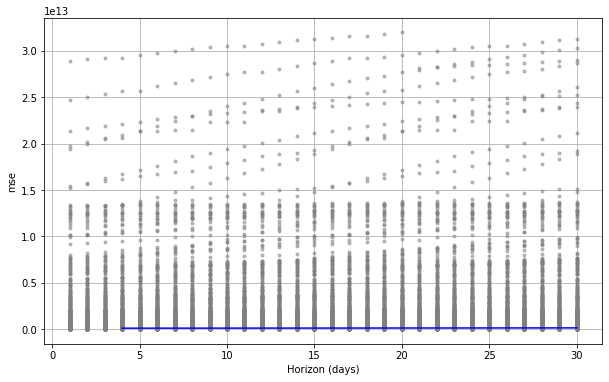

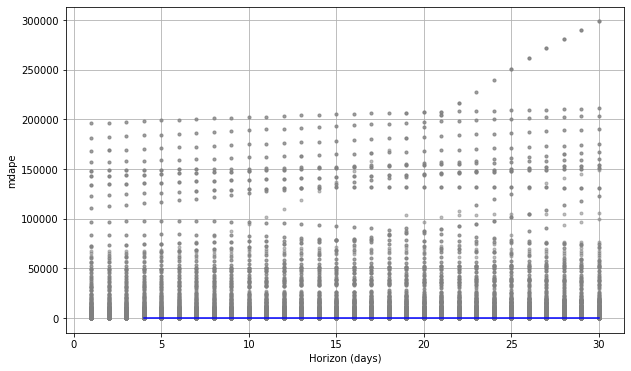

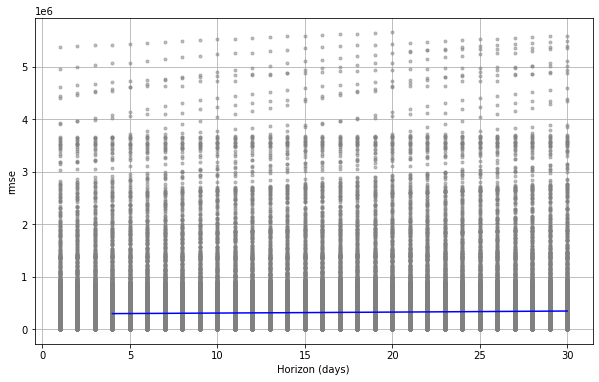

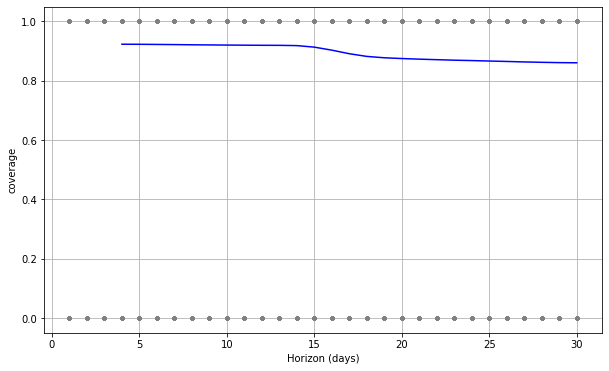

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv ,metric='mse')
fig = plot_cross_validation_metric(df_cv ,metric='mdape')
fig = plot_cross_validation_metric(df_cv ,metric='rmse')
fig = plot_cross_validation_metric(df_cv ,metric='coverage')


# Country / State having the highest number of cases:

In [ ]:
import numpy as np
array = np.unique(df_x['Country/Region'])
df_x['Country/Region'].value_counts()
list1 = []
list2 = []
for i in range(0,229):
  df_count = df_x[df_x['Country/Region'] == array[i]]
  sum = df_count['Confirmed'].sum()
  list1.append(sum)
  list2.append(array[i])
data_cnf = pd.DataFrame(list(zip(list2,list1)), columns=['country','confirmedcases'])
data_cnf.head()
data_cnf.to_csv('confiremed_cases.csv',index=False)
print("THE HIGHEST CONFIREMED_CASES ARE : {0} ".format(np.max(data_cnf['confirmedcases'])))
data_cnf.loc[data_cnf['confirmedcases'] == np.max(data_cnf['confirmedcases']) ]


THE HIGHEST CONFIREMED_CASES ARE : 6049145667.0 


,country,confirmedcases
214,US,6.049146e+09


# Country / State having the lowest number of case:

In [ ]:
print("THE LOWEST CONFIREMED_CASES ARE : {0} ".format(np.min(data_cnf['confirmedcases'])))
data_cnf.loc[data_cnf['confirmedcases'] == np.min(data_cnf['confirmedcases']) ]

THE LOWEST CONFIREMED_CASES ARE : 0.0 


,country,confirmedcases
43,China,0.0


# Forecasting for Death cases:

In [ ]:
df2 = df.iloc[:,[0,5]]
df2

,ObservationDate,Deaths
0,01/22/2020,0.0
1,01/22/2020,0.0
2,01/22/2020,0.0
3,01/22/2020,0.0
4,01/22/2020,0.0
...,...,...
306424,05/29/2021,2335.0
306425,05/29/2021,245.0
306426,05/29/2021,1.0
306427,05/29/2021,1738.0


In [ ]:
df2 = df2.rename(columns ={'Deaths':'y','ObservationDate':'ds'})

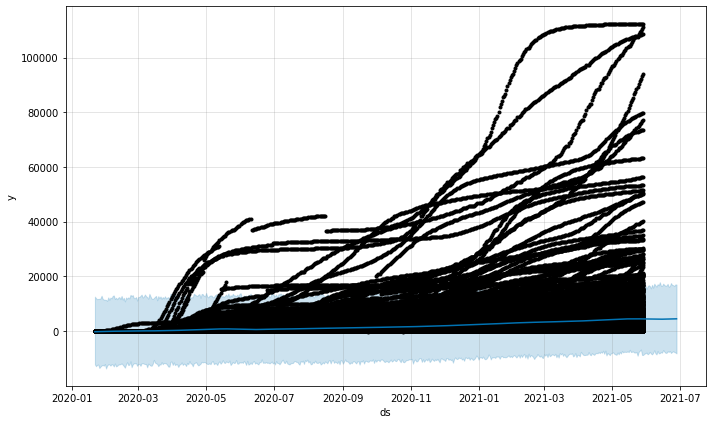

In [ ]:
from fbprophet import Prophet
#dir(Prophet)
model = Prophet(interval_width=0.95,daily_seasonality=True,yearly_seasonality=True)
model.fit(df2)
model.component_modes
future_dates = model.make_future_dataframe(periods=30,freq='D',include_history=True)
prediction = model.predict(future_dates)
#prediction.head()
plot3 = model.plot(prediction[['ds','yhat_lower','trend','yhat_upper','yhat']])


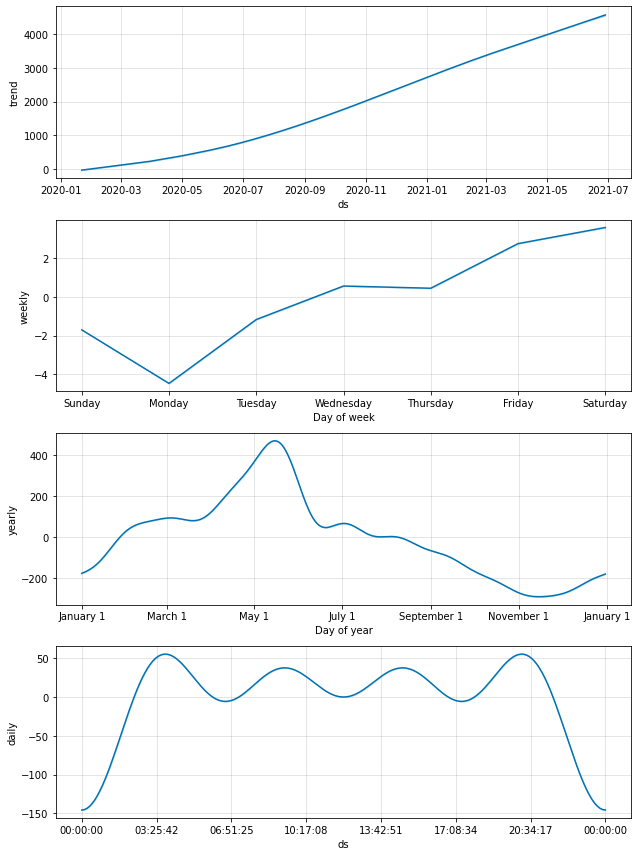

In [ ]:
plot4 = model.plot_components(prediction)

**Country / State having the highest number of deaths :**

In [ ]:
import numpy as np
array = np.unique(df_x['Country/Region'])
df_x['Country/Region'].value_counts()
list3 = []
list4 = []
for i in range(0,229):
  df_death = df_x[df_x['Country/Region'] == array[i]]
  sum = df_death['Deaths'].sum()
  list3.append(sum)
  list4.append(array[i])
data_ded = pd.DataFrame(list(zip(list4,list3)), columns=['country','Deaths'])
data_ded.head()
data_ded.to_csv('total_deaths.csv',index=False)
print("THE HIGHEST Deaths  ARE : {0} ".format(np.max(data_ded['Deaths'])))
data_ded.loc[data_ded['Deaths'] == np.max(data_ded['Deaths']) ]


THE HIGHEST Deaths  ARE : 123303762.0 


,country,Deaths
214,US,123303762.0


**Country / State having the lowest number of Deaths:**

In [ ]:
print("THE LOWEST DEATHS ARE : {0} ".format(np.min(data_ded['Deaths'])))
data_ded.loc[data_ded['Deaths'] == np.min(data_ded['Deaths']) ]

THE LOWEST DEATHS ARE : 0.0 


,country,Deaths
0,Azerbaijan,0.0
1,"('St. Martin',)",0.0
10,Aruba,0.0
15,"Bahamas, The",0.0
37,Cape Verde,0.0
38,Cayman Islands,0.0
41,Channel Islands,0.0
43,China,0.0
51,Curacao,0.0
57,Dominica,0.0


# Forecasting for Recovered Cases:

In [ ]:
df3 = df_x.iloc[:,[0,6]]
df3

,ObservationDate,Recovered
0,2020-01-22,0.0
1,2020-01-22,0.0
2,2020-01-22,0.0
3,2020-01-22,0.0
4,2020-01-22,0.0
...,...,...
306424,2021-05-29,95289.0
306425,2021-05-29,0.0
306426,2021-05-29,1324.0
306427,2021-05-29,83790.0


In [ ]:
df3 = df3.rename(columns ={'Recovered':'y','ObservationDate':'ds'})

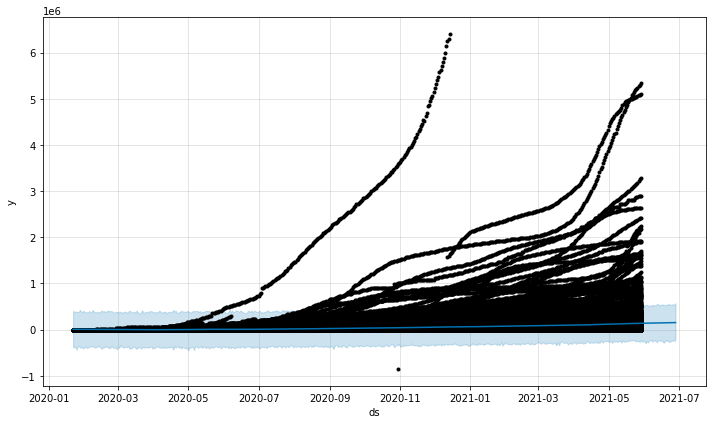

In [ ]:
from fbprophet import Prophet
#dir(Prophet)
model = Prophet(interval_width=0.95,daily_seasonality=True , yearly_seasonality=True)
model.fit(df3)
model.component_modes
future_dates = model.make_future_dataframe(periods=30,freq='D',include_history=True)
prediction = model.predict(future_dates)
#prediction.head()
plot6 = model.plot(prediction[['ds','yhat_lower','trend','yhat_upper','yhat']])


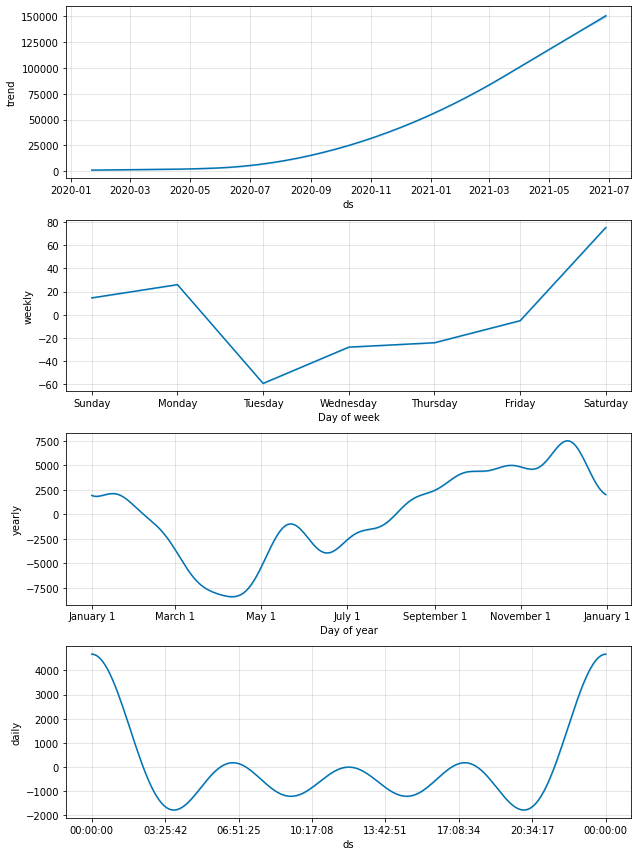

In [ ]:
plot5 = model.plot_components(prediction)

**Country / Sate having the highest number of Recoveris:**

In [ ]:
import numpy as np
array = np.unique(df_x['Country/Region'])
df_x['Country/Region'].value_counts()
list5 = []
list6 = []
for i in range(0,229):
  df_recov = df_x[df_x['Country/Region'] == array[i]]
  sum = df_recov['Deaths'].sum()
  list5.append(sum)
  list6.append(array[i])
data_rec = pd.DataFrame(list(zip(list6,list5)), columns=['country','recover'])
data_rec.head()
data_rec.to_csv('total_recover.csv',index=False)
print("THE HIGHEST RECOVERD  ARE : {0} ".format(np.max(data_rec['recover'])))
data_rec.loc[data_rec['recover'] == np.max(data_rec['recover']) ]


THE HIGHEST RECOVERD  ARE : 123303762.0 


,country,recover
214,US,123303762.0


In [ ]:
print("THE LOWEST recover ARE : {0} ".format(np.min(data_rec['recover'])))
data_rec.loc[data_rec['recover'] == np.min(data_rec['recover'])]

THE LOWEST recover ARE : 0.0 


,country,recover
0,Azerbaijan,0.0
1,"('St. Martin',)",0.0
10,Aruba,0.0
15,"Bahamas, The",0.0
37,Cape Verde,0.0
38,Cayman Islands,0.0
41,Channel Islands,0.0
43,China,0.0
51,Curacao,0.0
57,Dominica,0.0
